In [0]:
import sklearn.datasets as dt 

In [0]:
import numpy as np

In [0]:
iris=dt.load_iris()
bre=dt.load_breast_cancer()

In [0]:
x=bre.data

In [0]:
y=bre.target

In [0]:
import pandas as pd

In [0]:
data=pd.DataFrame(bre.data,columns=bre.feature_names)

In [0]:
#x.shape

In [0]:
#y.shape

In [0]:
#data.head()

In [0]:
#data['class']=bre.target

In [0]:
#data.head()

In [0]:
#data.describe()

In [0]:
data['class'].value_counts()

In [0]:
bre.target_names

In [0]:
data.groupby('class').mean()

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x=data.drop(labels='class',axis=1)

In [0]:
y=data['class']

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

In [0]:
#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [0]:
print(y.mean(),y_train.mean(),y_test.mean())

In [0]:
import matplotlib.pyplot as plt


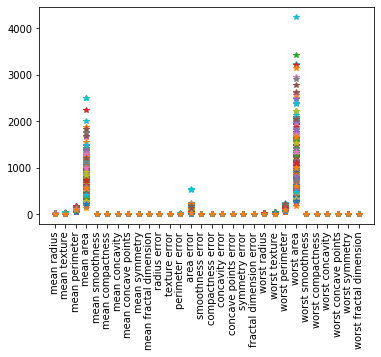

In [30]:
plt.plot(x_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:

"""manual conversion"""
binary_x_train3=x_train['mean area'].map(lambda x:0 if x<1000 else 1 )

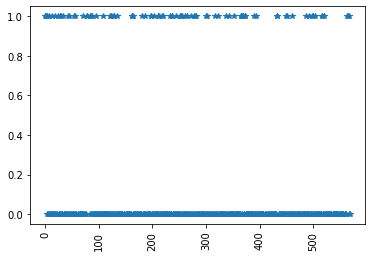

In [0]:
plt.plot(binary_x_train3.T,'*')
plt.xticks(rotation='vertical')
plt.show()

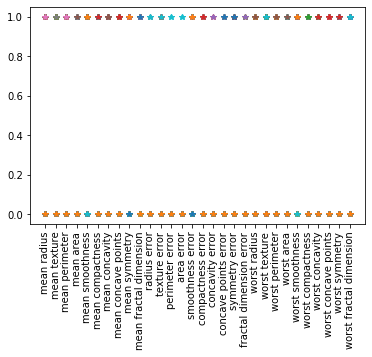

In [55]:
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[0,1])
plt.plot(x_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[0,1])

In [0]:
#x_binarised_train.groupby(['class']).mean()
x_binarised_train

In [0]:
from random import randint

In [0]:
i=randint(0,x_binarised_train.shape[0])
b=4;

In [0]:
i
import numpy as np

In [0]:

x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[0,1])



"""converting x_binarised_train into dataframe to apply np.sum() method """
dt = x_binarised_train.values


In [73]:
#finding accuracy for each value of b possible


for b in range(0,dt.shape[1]+1):
  acuracy=0
  dt = x_binarised_train.values
  xp=[]

  for l,y in zip(dt,y_train):
    x_pred=((np.sum(l))>=b)
    if(y==x_pred):
      acuracy+=1
    xp.append(x_pred)
  a=acuracy/dt.shape[0]
  print(a,b)  







0.626953125 0
0.259765625 1
0.193359375 2
0.154296875 3
0.15234375 4
0.16796875 5
0.18359375 6
0.22265625 7
0.2578125 8
0.283203125 9
0.306640625 10
0.328125 11
0.33203125 12
0.33984375 13
0.34765625 14
0.35546875 15
0.361328125 16
0.365234375 17
0.37109375 18
0.373046875 19
0.373046875 20
0.373046875 21
0.373046875 22
0.373046875 23
0.373046875 24
0.373046875 25
0.373046875 26
0.373046875 27
0.373046875 28
0.373046875 29
0.373046875 30


In [0]:
"""for more accuracy"""
"""only for this particular dataset"""
x_binarised_train=x_train.apply(pd.cut,bins=2,labels=[1,0])
x_binarised_test=x_test.apply(pd.cut,bins=2,labels=[1,0])



"""converting x_binarised_train into dataframe to apply np.sum() method """
dt = x_binarised_train.values


In [76]:
#finding accuracy for each value of b possible


for b in range(0,dt.shape[1]+1):
  acuracy=0
  dt = x_binarised_train.values
  xp=[]

  for l,y in zip(dt,y_train):
    x_pred=((np.sum(l))>=b)
    if(y==x_pred):
      acuracy+=1
    xp.append(x_pred)
  a=acuracy/dt.shape[0]
  print(a,b)  




0.626953125 0
0.626953125 1
0.626953125 2
0.626953125 3
0.626953125 4
0.626953125 5
0.626953125 6
0.626953125 7
0.626953125 8
0.626953125 9
0.626953125 10
0.626953125 11
0.626953125 12
0.62890625 13
0.634765625 14
0.638671875 15
0.64453125 16
0.65234375 17
0.66015625 18
0.66796875 19
0.671875 20
0.693359375 21
0.716796875 22
0.7421875 23
0.77734375 24
0.81640625 25
0.83203125 26
0.84765625 27
0.845703125 28
0.806640625 29
0.740234375 30


#now predicting on test set

In [0]:

from sklearn.metrics import accuracy_score

In [0]:
b=28    #from above observation
  

In [80]:
acuracy=0
dt1 = x_binarised_test.values
xp=[]

for l,y in zip(dt1,y_test):
  x_pred=((np.sum(l))>=b)
  xp.append(x_pred)
a=accuracy_score(xp,y_test)  
print(a,b)

0.7894736842105263 28


#   MP NEURON CLASS

In [0]:
class MP_neuron:
  def __init__(self):
    self.b=None
  def Model(self,x):
    y=[]
    y=(sum(x)>=self.b) 

    return y
  def predict(self,X):
    y_pred=[]
    for x in X:
      y1=self.Model(x)
      y_pred.append(y1)
    return np.array(y_pred)
  def accuracy(self,x,y):
    


    a={}
    for b in range(x.shape[1]+1):
      self.b=b
      y1=self.predict(x)

      a[b]=accuracy_score(y,y1) 
      #print(a[b],b)
    best_b= max(a, key=a.get)
    self.b=best_b
    print("optimal b= ",best_b)
    print("accuracy = ",a[best_b])
    return best_b
  def accuracy_test(self,x,y,a4):
    self.b=a4
    y1=self.predict(x)

    ac=accuracy_score(y,y1) 
      #print(a[b],b)
    #best_b= max(a, key=a.get)
    #self.b=best_b
    print("optimal b= ",self.b)
    print("accuracy = ",ac)
   


In [232]:
mp=MP_neuron()
a4=mp.accuracy(dt,y_train)

optimal b=  27
accuracy =  0.84765625


In [233]:
mp.accuracy_test(dt1,y_test,a4)
    
    
      
   


optimal b=  27
accuracy =  0.8771929824561403
